<a href="https://colab.research.google.com/github/abyanmusyaffa/customer-churn-prediction-analysis/blob/main/25_21_1598_Big_Data_%26_Data_Mining_(Final_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load Dataset
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
# Penanganan TotalCharges (Convert to numeric & handle nulls)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)

# Menghapus kolom yang tidak diperlukan
df.drop('customerID', axis=1, inplace=True)

# Encoding Variabel Kategorikal
# Pisahkan kolom biner dan multi-kategori
le = LabelEncoder()
binary_cols = [col for col in df.columns if df[col].dtype == 'object' and df[col].nunique() == 2]

for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# One-Hot Encoding untuk fitur kategorik yang lebih dari 2 label
df = pd.get_dummies(df)

# Feature Scaling (Opsional tapi disarankan)
scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
print("Preprocessing Selesai!")
print(f"Ukuran data setelah dibersihkan: {df.shape}")
df.head()

Preprocessing Selesai!
Ukuran data setelah dibersihkan: (7032, 41)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.280248,0,1,-1.161694,-0.994194,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,0.064303,1,0,-0.260878,-0.173740,0,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,-1.239504,1,1,-0.363923,-0.959649,1,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,0.512486,0,0,-0.747850,-0.195248,0,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,-1.239504,1,1,0.196178,-0.940457,1,...,True,False,False,True,False,False,False,False,True,False


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style visualisasi
sns.set(style="whitegrid")

/tmp/ipython-input-1531898663.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis')


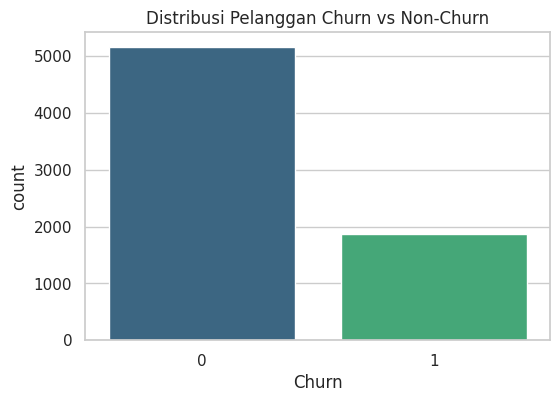

In [ ]:
# 1. Distribusi Churn (Target)
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Distribusi Pelanggan Churn vs Non-Churn')
plt.show()

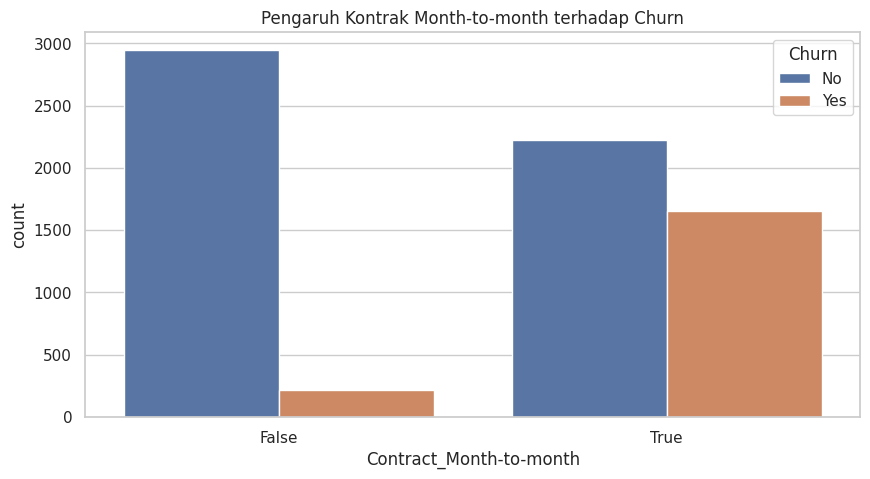

In [ ]:
# 2. Analisis Kontrak terhadap Churn
plt.figure(figsize=(10, 5))
sns.countplot(x='Contract_Month-to-month', hue='Churn', data=df)
plt.title('Pengaruh Kontrak Month-to-month terhadap Churn')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

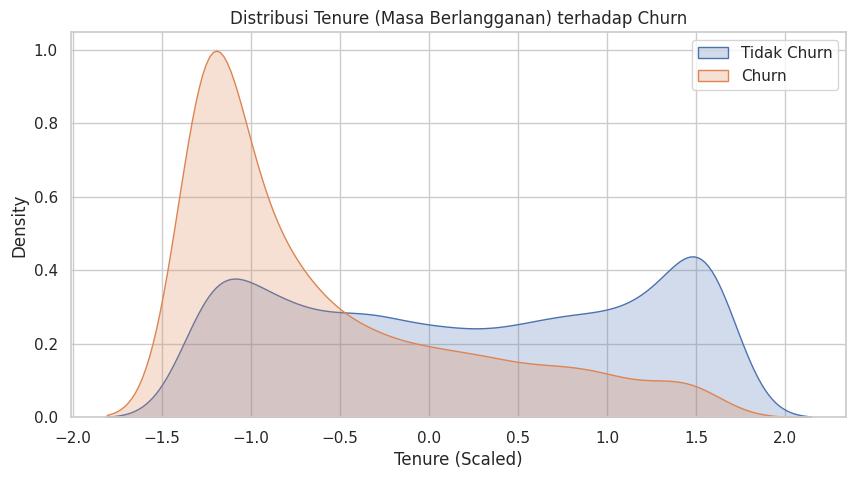

In [ ]:
# 3. Distribusi Tenure terhadap Churn
plt.figure(figsize=(10, 5))
sns.kdeplot(df.tenure[df.Churn == 0], label='Tidak Churn', fill=True)
sns.kdeplot(df.tenure[df.Churn == 1], label='Churn', fill=True)
plt.title('Distribusi Tenure (Masa Berlangganan) terhadap Churn')
plt.xlabel('Tenure (Scaled)')
plt.legend()
plt.show()


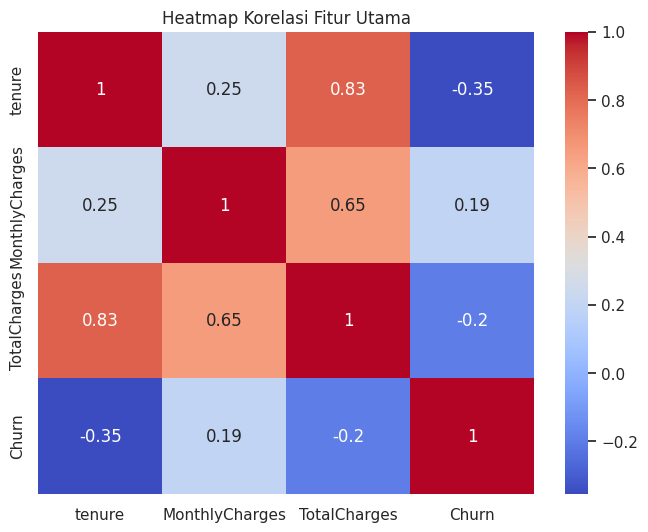

In [ ]:
# 4. Korelasi antar Fitur Numerik
plt.figure(figsize=(8, 6))
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Fitur Utama')
plt.show()

/tmp/ipython-input-3689098857.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df.head(10), palette='magma')


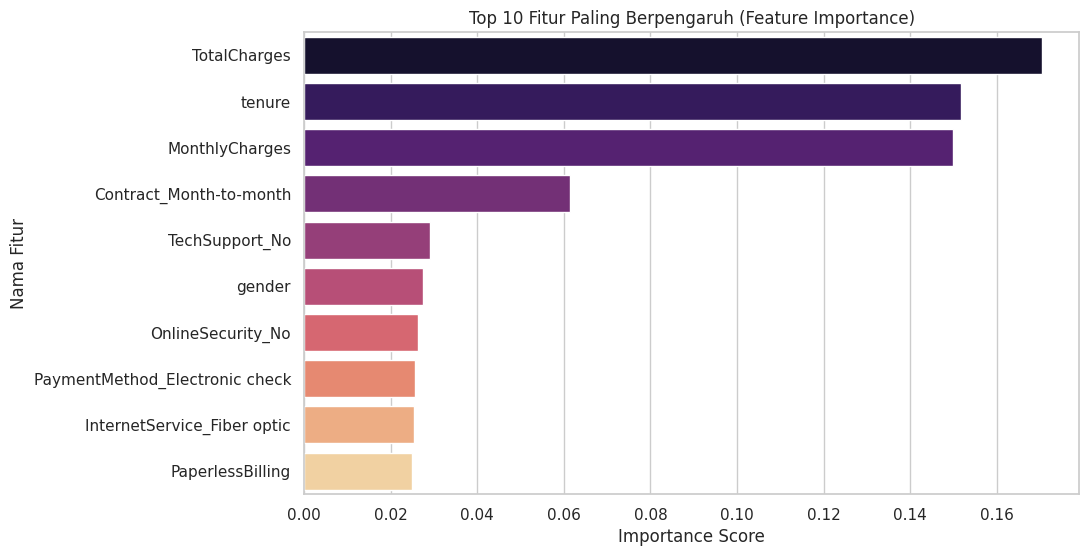

                           Feature  Importance
8                     TotalCharges    0.170544
4                           tenure    0.151642
7                   MonthlyCharges    0.149882
33         Contract_Month-to-month    0.061311
24                  TechSupport_No    0.029167
0                           gender    0.027512
15               OnlineSecurity_No    0.026309
38  PaymentMethod_Electronic check    0.025556
13     InternetService_Fiber optic    0.025462
6                 PaperlessBilling    0.024962


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

# 1. Menyiapkan Data (X = fitur, y = target)
X = df.drop('Churn', axis=1)
y = df['Churn']

# 2. Inisialisasi dan Fitting Model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# 3. Mendapatkan Feature Importance
importances = rf_model.feature_importances_
feature_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# 4. Mengurutkan fitur dari yang paling penting
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# 5. Visualisasi 10 Fitur Teratas
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df.head(10), palette='magma')
plt.title('Top 10 Fitur Paling Berpengaruh (Feature Importance)')
plt.xlabel('Importance Score')
plt.ylabel('Nama Fitur')
plt.show()

print(feature_df.head(10))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle

# 1. Pemisahan Fitur dan Target
X = df.drop('Churn', axis=1)
y = df['Churn']

# 2. Split Dataset menjadi Train dan Test set (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Inisialisasi dan Training Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 4. Menyimpan Model
filename = 'model_telco_churn.pkl'
pickle.dump(model, open(filename, 'wb'))

print("--- Modeling Selesai ---")
print(f"Model berhasil disimpan sebagai: {filename}")
print(f"Jumlah data training: {X_train.shape[0]}")
print(f"Jumlah data testing: {X_test.shape[0]}")

--- Modeling Selesai ---
Model berhasil disimpan sebagai: model_telco_churn.pkl
Jumlah data training: 5625
Jumlah data testing: 1407


--- Classification Report ---
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.64      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407

Total Accuracy: 0.79


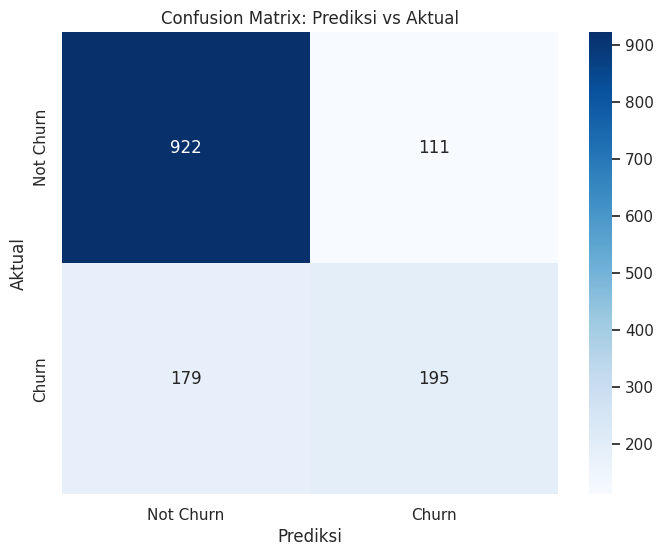

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Melakukan Prediksi pada Data Testing
y_pred = model.predict(X_test)

# 2. Menampilkan Classification Report
print("--- Classification Report ---")
print(classification_report(y_test, y_pred))

# 3. Menghitung Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Total Accuracy: {acc:.2f}")

# 4. Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix: Prediksi vs Aktual')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()